Build a CNN model using Tensorflow & Keras to train a classifier to predict the MINIST hand written digits. You are free to choose any architecture like AlexNet, VGG or any other.
Try Three different optimizers – 1) SGD, 2) ADAM, & 3) RMSProp
And finally compare these results.

ID: 20-43011-1 .
Name: Sowrov Ahmed  .
Section: A.

<h5>Load necessary packages</h5>

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

<h5>GPU configuration</h5>


In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")

Number of GPU = 0


<h5>Loading dataset</h5>

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


<h5>Displaying images</h5>

Image #15: Which is digit '7'


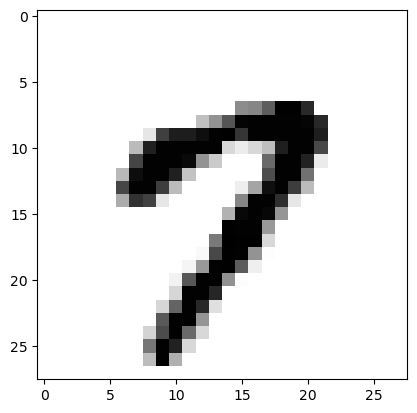

In [4]:
digit = 15 #random number to display image
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image #{digit}: Which is digit '{y_train[digit]}'")

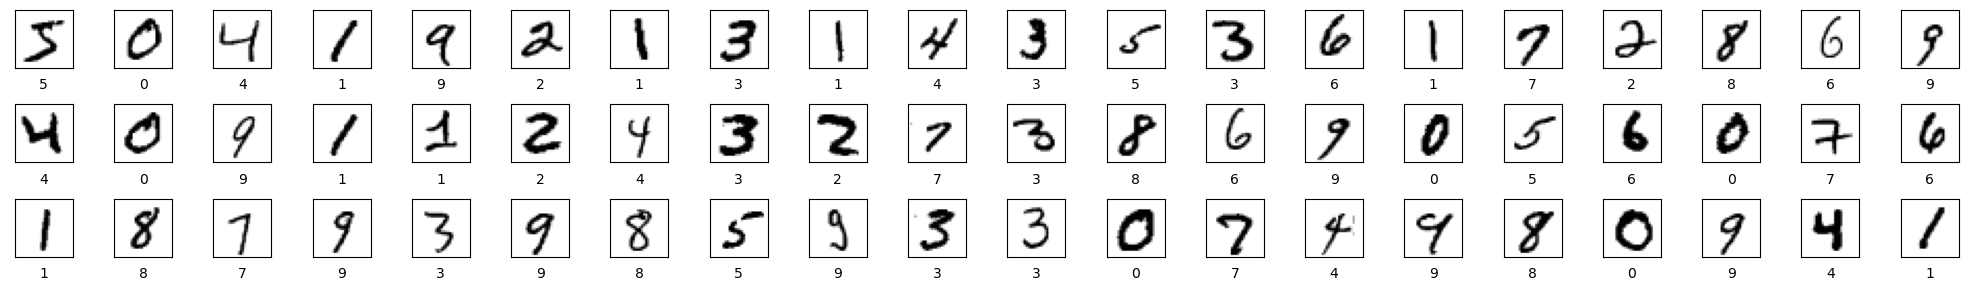

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

<h5>Normalizing data</h5>

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")/255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")/255.0
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


Image (#15): Which is digit '7'


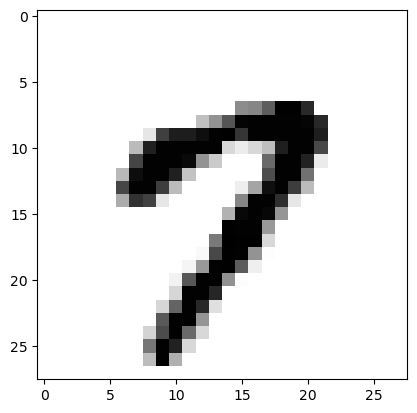

In [7]:
digit = 15 #random number to display image
plt.imshow(x_train[digit], cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

<h5>Building the CNN model using AlexNet</h5>

In [8]:
model = keras.Sequential([
    keras.Input(shape=x_train.shape[1:]),
    
    layers.Conv2D(filters=96, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 96)        2496      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                        

Compiling and training the model using three different optimizers: Adam, SGD and RMSprop.

In [9]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h1 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 638s 968ms/step - loss: 0.2411 - accuracy: 0.9442 - val_loss: 0.2921 - val_accuracy: 0.9523
Epoch 2/5
657/657 [==============================] - 715s 1s/step - loss: 0.1189 - accuracy: 0.9746 - val_loss: 0.1252 - val_accuracy: 0.9817
Epoch 3/5
657/657 [==============================] - 781s 1s/step - loss: 0.1028 - accuracy: 0.9803 - val_loss: 0.0862 - val_accuracy: 0.9833
Epoch 4/5
657/657 [==============================] - 745s 1s/step - loss: 0.0854 - accuracy: 0.9825 - val_loss: 0.0690 - val_accuracy: 0.9886
Epoch 5/5
657/657 [==============================] - 737s 1s/step - loss: 0.0673 - accuracy: 0.9871 - val_loss: 0.0598 - val_accuracy: 0.9892


In [11]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
h2 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 637s 968ms/step - loss: 0.0307 - accuracy: 0.9928 - val_loss: 0.0406 - val_accuracy: 0.9912
Epoch 2/5
657/657 [==============================] - 631s 960ms/step - loss: 0.0234 - accuracy: 0.9944 - val_loss: 0.0372 - val_accuracy: 0.9925
Epoch 3/5
657/657 [==============================] - 641s 976ms/step - loss: 0.0195 - accuracy: 0.9948 - val_loss: 0.0362 - val_accuracy: 0.9929
Epoch 4/5
657/657 [==============================] - 645s 981ms/step - loss: 0.0184 - accuracy: 0.9952 - val_loss: 0.0362 - val_accuracy: 0.9929
Epoch 5/5
657/657 [==============================] - 633s 964ms/step - loss: 0.0177 - accuracy: 0.9956 - val_loss: 0.0344 - val_accuracy: 0.9929


In [13]:
model.compile(
    optimizer='RMSprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [14]:
h3 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 2710s 4s/step - loss: 0.0416 - accuracy: 0.9910 - val_loss: 0.0537 - val_accuracy: 0.9900
Epoch 2/5
657/657 [==============================] - 618s 941ms/step - loss: 0.0382 - accuracy: 0.9913 - val_loss: 0.0652 - val_accuracy: 0.9869
Epoch 3/5
657/657 [==============================] - 1194s 2s/step - loss: 0.0335 - accuracy: 0.9928 - val_loss: 0.0652 - val_accuracy: 0.9911
Epoch 4/5
657/657 [==============================] - 621s 945ms/step - loss: 0.0326 - accuracy: 0.9935 - val_loss: 0.0597 - val_accuracy: 0.9911
Epoch 5/5
657/657 [==============================] - 1161s 2s/step - loss: 0.0253 - accuracy: 0.9945 - val_loss: 0.0775 - val_accuracy: 0.9889


<h5>Plotting graph for training results</h5>

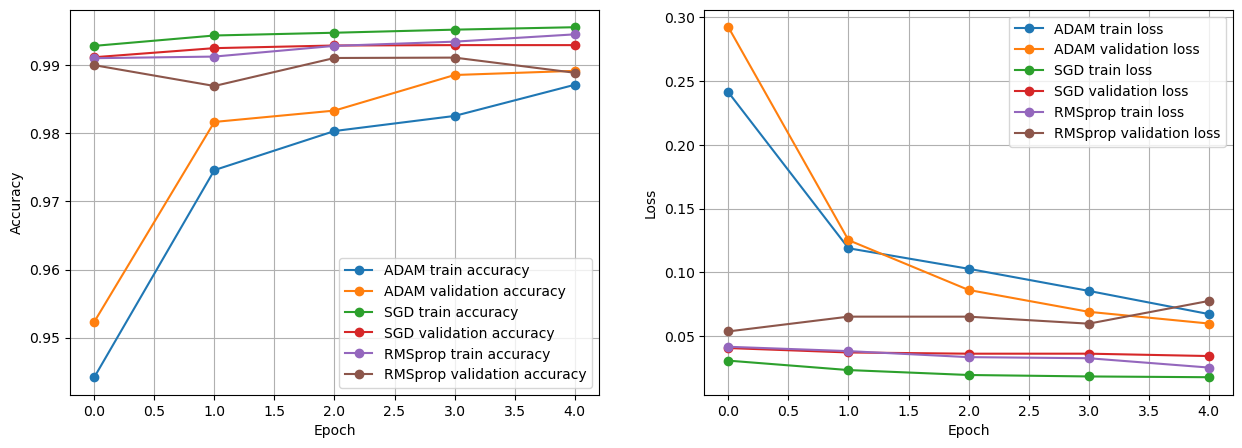

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='ADAM train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'ADAM validation accuracy')
plt.plot(h2.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(h3.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='ADAM train loss')
plt.plot(h1.history['val_loss'], 'o-', label='ADAM validation loss') 
plt.plot(h2.history['loss'], 'o-', label='SGD train loss')
plt.plot(h2.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(h3.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(h3.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

<h5>Evaluate the model on the test dataset</h5>

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 22s 71ms/step - loss: 0.0842 - accuracy: 0.9872

Test accuracy: 0.9872000217437744
Test loss: 0.08424030989408493


<h5>Making predictions on the entire test images</h5>

In [19]:
predictions = []
predictions = model.predict(x_test)

313/313 [==============================] - 19s 61ms/step


4/4 [==============================] - 0s 41ms/step


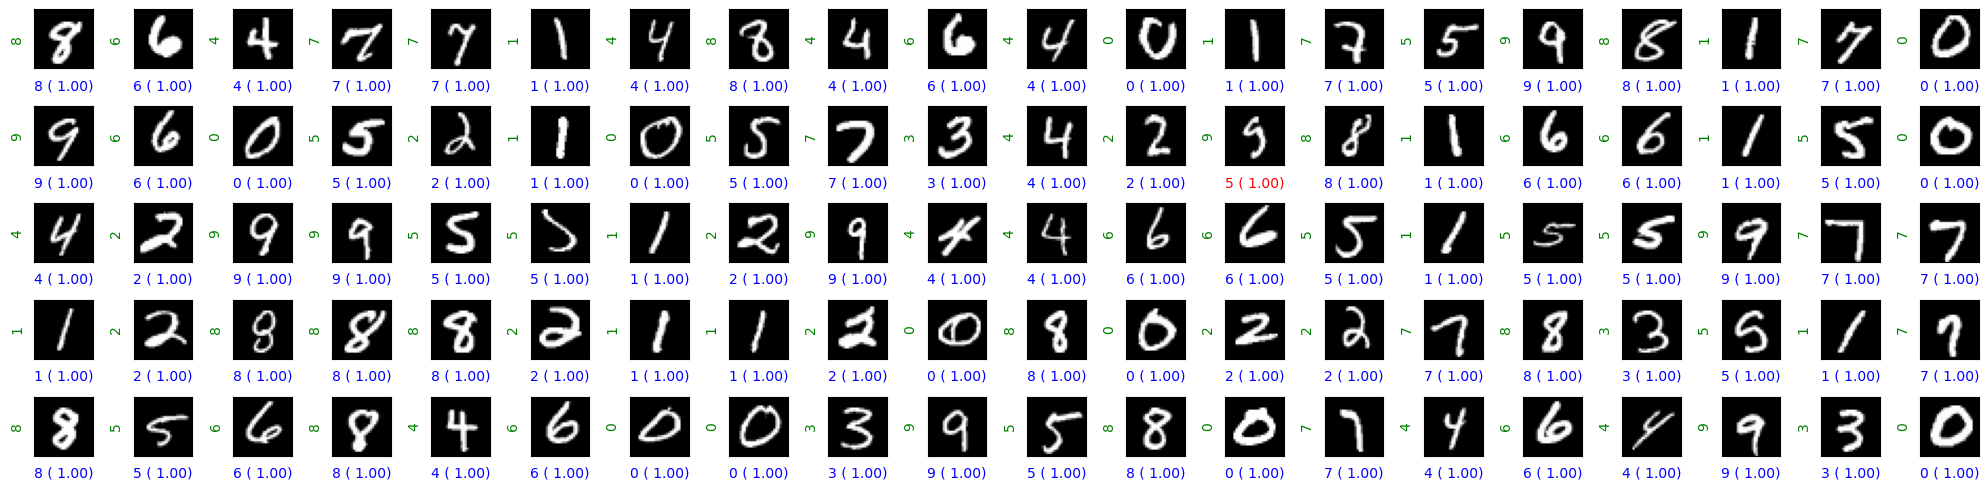

In [23]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()